In [3]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
#importing required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt        

In [7]:
#loading the dataset
data = pd.read_csv(r"C:\Users\HP\Downloads\netflix_titles.csv\netflix_titles.csv.csv")

In [8]:
print(data.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [9]:
#Data Cleaning
data = data.dropna(subset=["type", "release_year", "rating", "country","duration"])

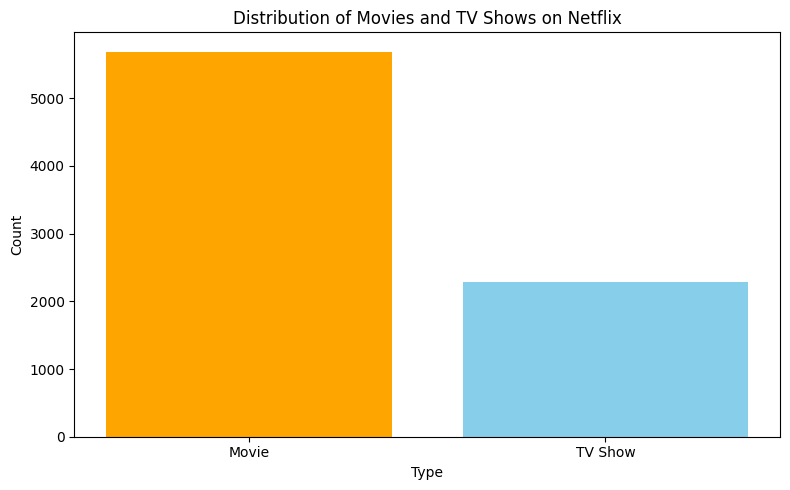

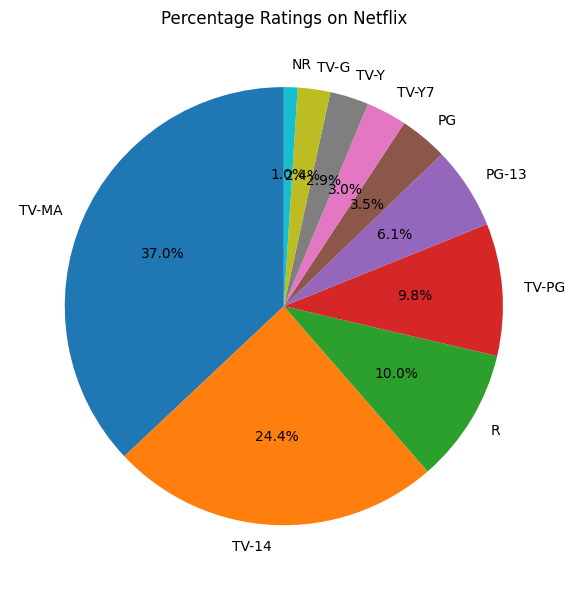

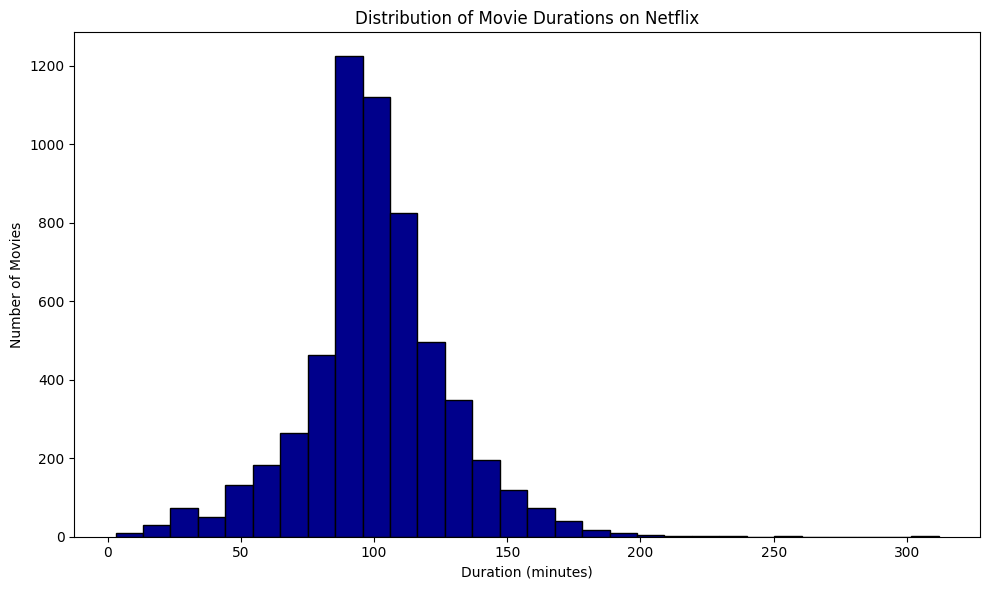

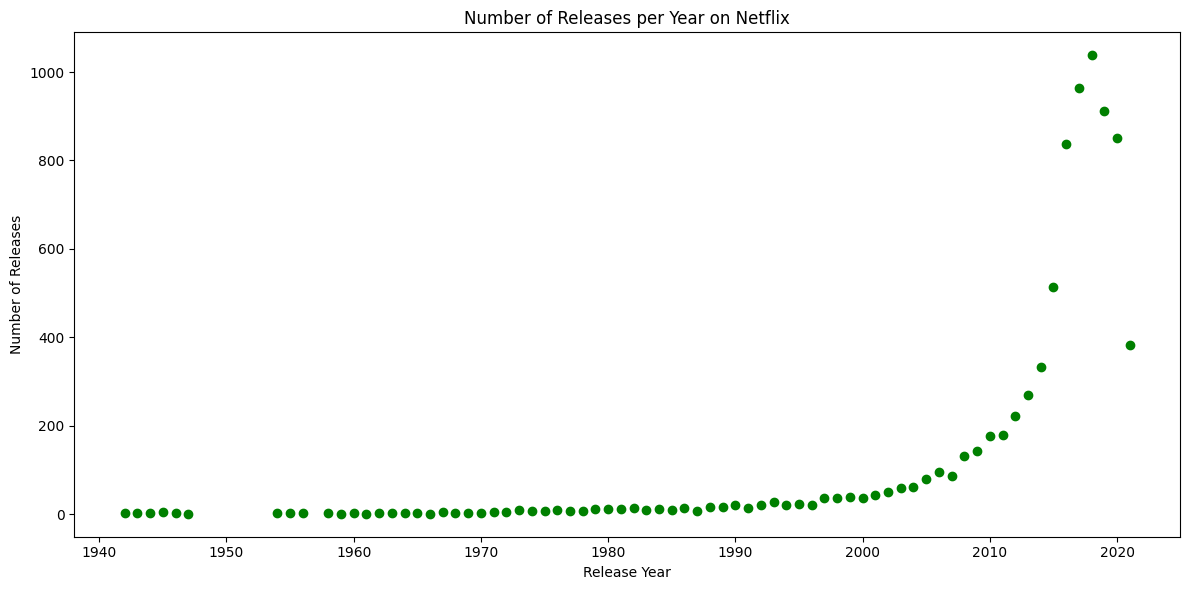

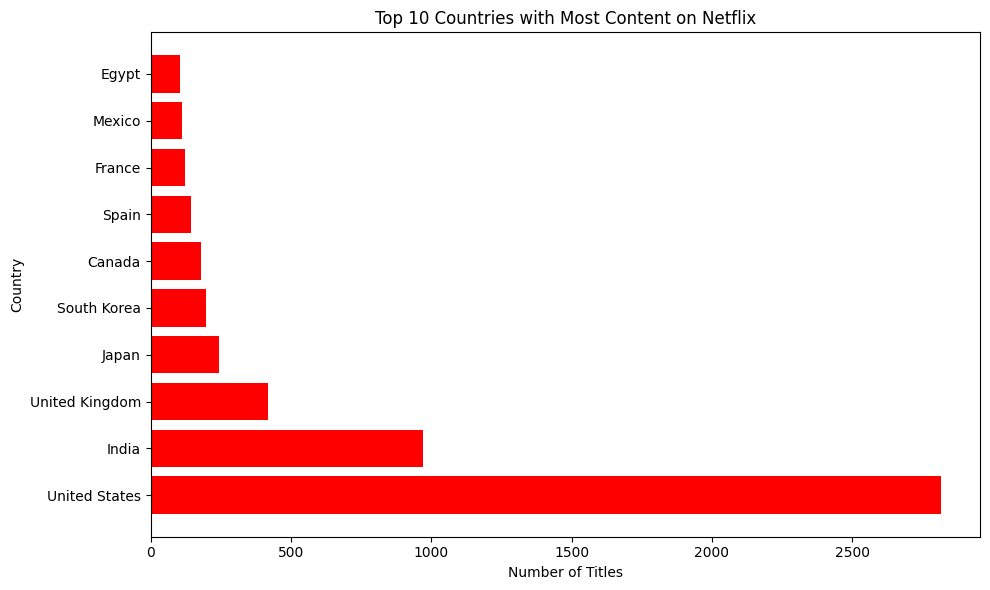

In [14]:
# Data Visualization

# Plotting the distribution of Movies and TV Shows with bar charts
type_counts = data["type"].value_counts()
plt.figure(figsize=(8,5))
plt.bar(type_counts.index, type_counts.values, color=['orange', 'skyblue'])
plt.title("Distribution of Movies and TV Shows on Netflix") 
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("netflix_type_distribution.png")
plt.show()

# Plotting the percentage of different ratings with pie chart
rating_counts = data["rating"].value_counts().head(10)
plt.figure(figsize=(10,6))
plt.pie(rating_counts, labels=rating_counts.index,autopct='%1.1f%%', startangle=90)
plt.title("Percentage Ratings on Netflix")
plt.tight_layout()
plt.savefig("Percentage Ratings on Netflix.png")
plt.show()

# Plotting the distribution of movie durations with histogram
movie_data = data[data["type"] == "Movie"].copy()
movie_data["duration"] = movie_data["duration"].str.replace(" min", "").astype(int)
plt.figure(figsize=(10,6))
plt.hist(movie_data["duration"], bins=30, color='darkblue', edgecolor='black')
plt.title("Distribution of Movie Durations on Netflix")
plt.xlabel("Duration (minutes)") 
plt.ylabel("Number of Movies")
plt.tight_layout()  
plt.savefig("Distribution of Movie Durations on Netflix.png")
plt.show()

# Plotting the number of releases per year with scatter plot
release_year_counts = data["release_year"].value_counts().sort_index()
plt.figure(figsize=(12,6))
plt.scatter(release_year_counts.index, release_year_counts.values, color='green')
plt.title("Number of Releases per Year on Netflix")
plt.xlabel("Release Year")  
plt.ylabel("Number of Releases")
plt.tight_layout()  
plt.savefig("Number of Releases per Year on Netflix.png")
plt.show()

# Plotting the top 10 countries with the most content on Netflix with horizontal bar chart
country_counts = data["country"].value_counts().head(10)            
plt.figure(figsize=(10,6))
plt.barh(country_counts.index, country_counts.values, color='red')   
plt.title("Top 10 Countries with Most Content on Netflix")
plt.xlabel("Number of Titles")  
plt.ylabel("Country")
plt.tight_layout()  
plt.savefig("Top 10 Countries with Most Content on Netflix.png")
plt.show()

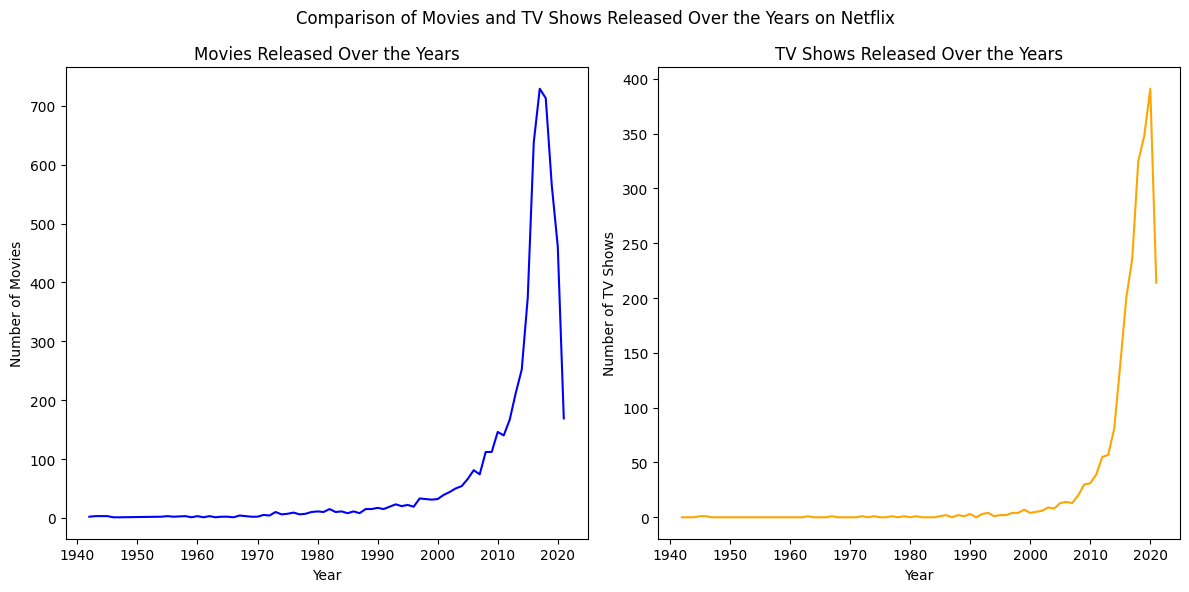

In [13]:
# Plotting the trend of content type over the years with subplots
content_by_year = data.groupby(['release_year', 'type']).size().unstack(fill_value=0)
fig, ax=plt.subplots(1,2,figsize=(12,6))

# Movies over the years: first subplot
ax[0].plot(content_by_year.index, content_by_year['Movie'], label='Movies', color='blue')
ax[0].set_title("Movies Released Over the Years")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Number of Movies")

# TV Shows over the years: second subplot
ax[1].plot(content_by_year.index, content_by_year['TV Show'], label='TV Shows', color='orange')
ax[1].set_title("TV Shows Released Over the Years") 
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Number of TV Shows")

fig.suptitle("Comparison of Movies and TV Shows Released Over the Years on Netflix")
plt.tight_layout()
plt.savefig("Comparison of Movies and TV Shows Released Over the Years on Netflix.png")
plt.show()
